# 💼 Freelance Salary Prediction Using Linear Regression

## 🎯 Use Case
This project predicts the salary (in USD) of freelance tech creatives based on experience level, job title, remote ratio, employment type, company size, and location.

### ✨ Mission Alignment:
This model empowers creatives to forecast their potential income and plan their professional growth, aligning with the mission to **create jobs and expand opportunities in arts, design, and culture** through technology.

---

## 🔍 Objective
- Build and optimize a Linear Regression model using gradient descent
- Compare it with Decision Tree and Random Forest
- Deploy the best-performing model as an API


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


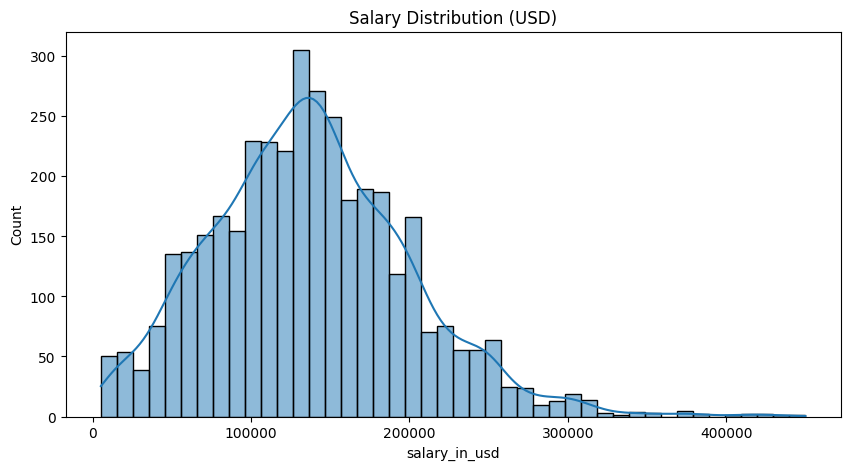

In [3]:
df.info()
df.describe()

# Optional: plot distributions
plt.figure(figsize=(10,5))
sns.histplot(df["salary_in_usd"], kde=True)
plt.title("Salary Distribution (USD)")
plt.show()


In [5]:
# Step 1: Select Features and Target
features = [
    'experience_level', 'employment_type', 'job_title',
    'employee_residence', 'remote_ratio', 'company_location', 'company_size'
]
target = 'salary_in_usd'

X = df[features]
y = df[target]

# Step 2: Define Categorical and Numerical Features
categorical_features = [
    'experience_level', 'employment_type', 'job_title',
    'employee_residence', 'company_location', 'company_size'
]
numerical_features = ['remote_ratio']

# Step 3: Preprocessor - OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shapes
X_train.shape, X_test.shape


((3004, 7), (751, 7))

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

# Step 5: Create pipeline with preprocessing and regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

# Step 6: Train the model
lr_pipeline.fit(X_train, y_train)

# Step 7: Predict on both train and test
y_train_pred = lr_pipeline.predict(X_train)
y_test_pred = lr_pipeline.predict(X_test)

# Step 8: Calculate and print losses
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_loss:.2f}")
print(f"Test MSE: {test_loss:.2f}")


Train MSE: 4961912875798901475508224.00
Test MSE: 4585178442492599968202752.00


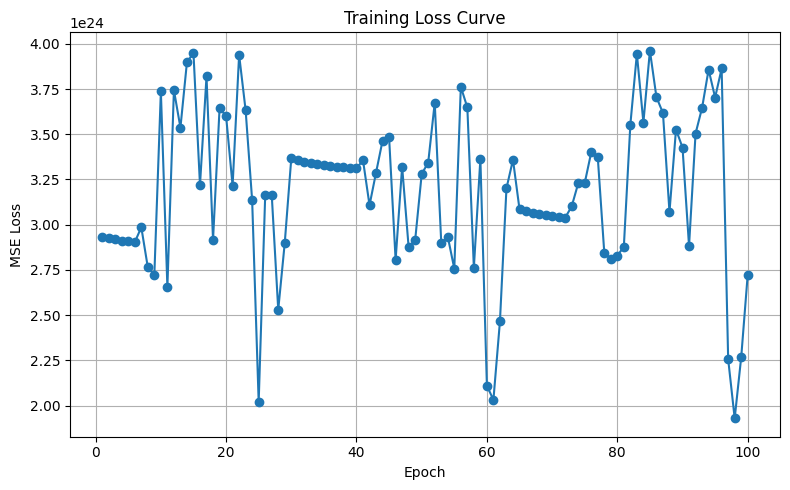

In [7]:
losses = []
sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.001, warm_start=True, random_state=42)

for epoch in range(100):
    sgd_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', sgd)
    ])
    sgd_pipeline.fit(X_train, y_train)
    pred = sgd_pipeline.predict(X_train)
    loss = mean_squared_error(y_train, pred)
    losses.append(loss)

# Plotting the training loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), losses, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Define the models
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train Decision Tree
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)

# Train Random Forest
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)

# Re-evaluate Linear Regression for clean comparison
lr_mse = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Decision Tree MSE: {tree_mse:.2f}")
print(f"Random Forest MSE: {forest_mse:.2f}")


Linear Regression MSE: 4585178442492599968202752.00
Decision Tree MSE: 2643905186.73
Random Forest MSE: 2312994970.53


In [9]:
import joblib

# Replace 'forest_model' with the actual best model if needed
best_model = forest_model

# Save the model to a .pkl file
joblib.dump(best_model, "best_model.pkl")

print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl
